**IMAGE COMPRESSION WITH K-MEANS CLUSTERING**

This is a popular beginner project to master the K-means clustering algorithm and apply it to an interesting and relatable problem. There are already many good implementations of the basic algorithm, hovewer, it is always interesting to fine-tune the basic implementation, try various options. 

I have implemented the K-means for similar problem during Machine Learning course on Coursera using Matlab, where I have programmed the algorithm manually (which is great for understanding the logic behind it). Now I wanted to try to implement similar project on Python. 

To help me with the implementation, I consulted https://towardsdatascience.com/image-compression-using-k-means-clustering-aa0c91bb0eeb

**To start, we will need to provide the value of K, which will correspond to the number of 'dominant' colours we will retain from the original image, and the image file name** 

In [1]:
K = 50

In [2]:
image_name = "cat.png"

**Further the algorithm performs the compression and saves the compressed image to the project folder, displaying original vs compressed image and the compression rate**

In [3]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import os

Read the image

In [4]:
image = io.imread(image_name)

Extract dimensions of the original image

In [5]:
rows = image.shape[0]
cols = image.shape[1]
rgbs = image.shape[2]

"Outroll" the image into a vector of pixels

In [6]:
image_reshaped = image.reshape(rows*cols, rgbs)

Implement k-means clustering to form K clusters

In [7]:
kmeans = KMeans(n_clusters=K)
kmeans.fit(image_reshaped);

We can check the initial parameters of the model in case we will want to tune them later

In [8]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 50,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Replace each pixel color value with its closest centroid

In [9]:
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

Reshape the image back to its original dimension

In [10]:
compressed_image = compressed_image.reshape(rows, cols, rgbs)

Save the compressed image

In [11]:
compressed_image_name = "compressed_"+image_name.strip(".png")+"_"+str(K)+".png"
io.imsave(compressed_image_name, compressed_image)

Plot original and compressed images side by side

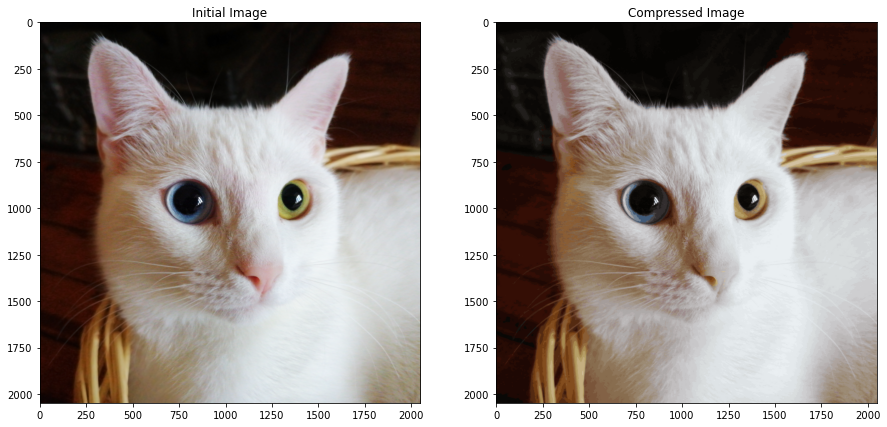

In [12]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
ax.imshow(image)
ax.set_title('Initial Image')
ax1 = fig.add_subplot(1,2,2)
ax1.imshow(compressed_image)
ax1.set_title('Compressed Image');

Print sizes of both images and the compression rate 

In [13]:
initial_image_size = os.stat(image_name).st_size
compressed_image_size = os.stat(compressed_image_name).st_size
compression = round(initial_image_size / compressed_image_size,1)
print(f"Initial image size: {initial_image_size} Bytes, Compressed image size: {compressed_image_size} Bytes, Compression factor: {compression}")

Initial image size: 3916202 Bytes, Compressed image size: 971026 Bytes, Compression factor: 4.0


<div class="alert alert-block alert-success">
<b>Conclusion:</b> K-means is a great way to compress an image. Normally, we cannot predict the factor of compression in advance, but it is possible to run the program with several values of K and see, which of them give an acceptable trade-off between image quality and size. 
</div>

Image credit: https://fr.m.wikipedia.org/wiki/Fichier:VAN_CAT.png